In [1]:
#Importing necessary packages
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.datasets import make_regression, make_blobs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
!pip install umap-learn
import umap
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import savefig
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=39515ca7255eca4b710fa8f954d2a5d290ce518b38e64d047c55d0f7659af1db
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=583dcc6ef64b20d738ad0ecd581c89906f889057444b8794aedc36a0da067557
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


In [2]:
#Allowing Google Drive access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the file
path = '/content/drive/MyDrive/Colab Notebooks/01. MSiA421/421_Project/'
df = pd.read_csv(path+'data.csv')
df.head(2)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


### Dimensionality Reduction Techniques

In [4]:
#Ordering data
df = df.sort_values(by=['Bankrupt?'], ascending=False).reset_index(drop=True)
df['Bankrupt?']

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [5]:
df_nolabel = df.drop(columns = ['Bankrupt?'], axis = 1)
df_nolabel

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.437089,0.466529,0.470207,0.595281,0.595281,0.998888,0.797224,0.809136,0.303406,0.781389,...,0.751652,0.001562,0.623239,0.595282,0.833238,0.290198,0.026689,0.564618,1,0.016470
2,0.416516,0.477976,0.474169,0.616981,0.616981,0.998903,0.796658,0.808718,0.302385,0.780927,...,0.764491,0.000891,0.623175,0.616975,0.836718,0.283286,0.026557,0.563721,1,0.021482
3,0.479745,0.545028,0.530060,0.619020,0.618235,0.999088,0.797430,0.809334,0.303347,0.781579,...,0.798701,0.003045,0.623882,0.619021,0.840290,0.281135,0.028226,0.568060,1,0.025232
4,0.491493,0.514828,0.531988,0.593768,0.593768,0.998888,0.797254,0.809188,0.303458,0.781422,...,0.783153,0.003999,0.624207,0.593765,0.839043,0.279303,0.026365,0.561751,1,0.031179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493979,0.557403,0.539162,0.600283,0.600283,0.999029,0.797479,0.809375,0.303555,0.781632,...,0.813228,0.006596,0.624072,0.600278,0.841557,0.280712,0.026791,0.565158,1,0.026284
6815,0.531029,0.620530,0.590877,0.618018,0.618018,0.999287,0.797820,0.809725,0.303611,0.781959,...,0.846191,0.016346,0.622752,0.618016,0.843601,0.278281,0.026825,0.565314,1,0.037125
6816,0.473895,0.538378,0.525617,0.610718,0.610718,0.999048,0.797556,0.809457,0.303649,0.781882,...,0.798702,0.006699,0.619432,0.610716,0.840237,0.278355,0.027696,0.567483,1,0.036579
6817,0.480183,0.559420,0.532470,0.600888,0.600881,0.999017,0.797555,0.809468,0.303713,0.781668,...,0.812442,0.029949,0.622418,0.600888,0.841502,0.280838,0.026846,0.565405,1,0.025955


In [6]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
std_scaler = MinMaxScaler()

#Scaling original dataframe 
df_scaled = std_scaler.fit_transform(df_nolabel.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df_nolabel.columns)

In [11]:
#n to determine number of components to use
n = 9

### 1. PCA

##### NON - STANDARDIZED DATA

In [12]:
pca = PCA(n_components = n)
pca_fit = pca.fit_transform(df_nolabel)
df_pca = pd.DataFrame(data = pca_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_pca

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,2.165330e+09,-3.814949e+07,-3.237615e+09,-2.063212e+09,-1.969494e+09,-1.410239e+09,-8.723455e+08,-3.342048e+09,-6.724872e+07
1,-2.465742e+09,-2.513995e+09,-1.701369e+09,-1.766255e+08,-6.333950e+08,-1.936577e+09,-8.246284e+08,-4.484320e+08,-1.028194e+08
2,-3.524543e+09,-3.308983e+09,-3.673567e+09,-2.291682e+09,3.053426e+09,5.561305e+09,1.919810e+09,-3.276531e+08,-8.599504e+07
3,-4.313078e+09,2.100470e+09,4.886998e+08,1.717827e+09,-2.173899e+09,5.158660e+09,-2.949721e+09,9.089302e+08,-1.345438e+07
4,6.502149e+09,-1.446123e+09,3.296735e+09,-6.591475e+08,-2.451713e+09,2.455249e+09,5.424097e+09,-3.795234e+09,-3.442695e+07
...,...,...,...,...,...,...,...,...,...
6814,-2.209289e+09,4.136438e+09,6.093245e+09,-1.472287e+09,2.343722e+09,-2.029461e+09,-2.741808e+08,1.684518e+09,2.385549e+06
6815,-2.148165e+09,-1.561824e+09,-2.920848e+08,5.479139e+08,-1.773656e+09,-2.193649e+09,-8.008484e+08,-3.382902e+08,-8.905055e+07
6816,1.421105e+09,7.176917e+07,-2.664709e+09,-1.580526e+09,-2.500598e+09,-1.449527e+09,-9.396464e+08,-3.622973e+09,-8.496916e+07
6817,8.116934e+08,-5.197284e+08,5.530286e+09,2.312089e+09,2.820530e+09,-2.716661e+09,2.988260e+08,4.638556e+08,-4.169192e+07


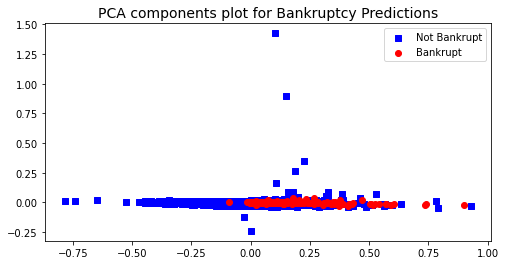

In [13]:
# Create plot from transformed dataset
X_pca = pca.fit(df_nolabel.iloc[:, 0:n]).transform(df_nolabel.iloc[:, 0:n])

plt.figure(figsize=(8,4))
plt.scatter(X_pca[220:,0], X_pca[220:,1], color='blue', marker='s', label='Not Bankrupt')
plt.scatter(X_pca[0:219,0], X_pca[0:219,1], color='red', marker='o', label='Bankrupt')
plt.title("PCA components plot for Bankruptcy Predictions", fontsize=14)
plt.legend()
plt.show()

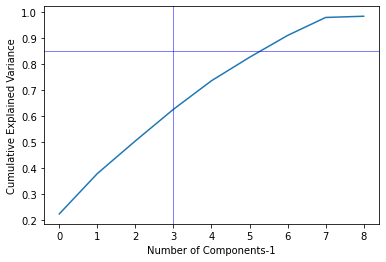

In [17]:
# Cumulative Variance explained
ax = plt.figure().gca()
pca = PCA(n_components = n).fit(df_nolabel)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axvline(x=3, linewidth=1, color='b', alpha=0.5)
plt.axhline(y=0.85, linewidth=1, color='b', alpha=0.5)
plt.xlabel('Number of Components-1')
plt.ylabel('Cumulative Explained Variance')
plt.show()

##### STANDARDIZED DATA

In [18]:
pca = PCA(n_components = n)
pca_fit = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = pca_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_pca

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,0.389698,-0.196544,-0.061993,-0.341714,-0.205487,-0.155309,-0.181974,-0.250419,-0.271058
1,-0.242322,-0.006432,-0.197410,-0.178240,-0.000528,-0.036149,-0.220764,-0.045469,-0.044654
2,-0.042063,-0.584700,-0.471165,-0.360423,-0.227726,0.409560,0.451516,-0.144908,0.083306
3,-0.322651,-0.292538,0.164709,0.066480,0.178753,-0.246279,0.556180,0.155805,-0.114912
4,0.802994,-0.095246,-0.273142,0.337190,-0.130268,-0.143580,0.074770,-0.632320,0.249983
...,...,...,...,...,...,...,...,...,...
6814,-0.332206,0.153672,0.545943,0.578759,-0.134211,0.201243,-0.183309,0.122871,0.149987
6815,-0.104850,-0.198883,-0.159238,0.005987,0.038405,-0.151141,-0.231011,0.020540,-0.185283
6816,0.172466,0.029292,0.064342,-0.288315,-0.133583,-0.240330,-0.204364,-0.421304,-0.112482
6817,0.139976,-0.033815,-0.021069,0.562739,0.208413,0.289690,-0.290592,0.036787,0.008932


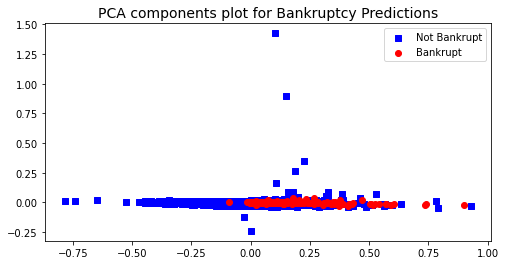

In [19]:
# Create plot from transformed dataset
X_pca = pca.fit(df_scaled.iloc[:, 0:n]).transform(df_scaled.iloc[:, 0:n])

plt.figure(figsize=(8,4))
plt.scatter(X_pca[220:,0], X_pca[220:,1], color='blue', marker='s', label='Not Bankrupt')
plt.scatter(X_pca[0:219,0], X_pca[0:219,1], color='red', marker='o', label='Bankrupt')
plt.title("PCA components plot for Bankruptcy Predictions", fontsize=14)
plt.legend()
plt.show()

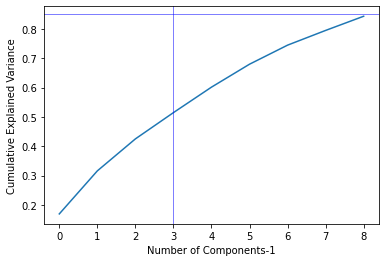

In [20]:
# Cumulative Variance explained
ax = plt.figure().gca()
pca = PCA(n_components = n).fit(df_scaled)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axvline(x=3, linewidth=1, color='b', alpha=0.5)
plt.axhline(y=0.85, linewidth=1, color='b', alpha=0.5)
plt.xlabel('Number of Components-1')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### 2. k-PCA

##### NON-STANDARDIZED DATA

In [21]:
kpca = KernelPCA(n_components=n, kernel='rbf')
kpca_fit = kpca.fit_transform(df_nolabel)
df_kpca = pd.DataFrame(data = kpca_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_kpca

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,-0.008477,-0.001322,-1.643350e-16,-0.001041,-0.00059,1.146219e-16,7.868373e-17,5.896585e-17,-1.055376e-16
1,-0.008477,-0.001322,-1.648199e-16,-0.001041,-0.00059,1.163120e-16,7.830815e-17,4.131365e-17,-1.047864e-16
2,-0.008477,-0.001322,-1.653048e-16,-0.001041,-0.00059,1.167111e-16,7.821425e-17,2.647829e-17,-1.044109e-16
3,-0.008477,-0.001322,-1.650623e-16,-0.001041,-0.00059,1.167345e-16,7.821425e-17,3.934186e-17,-1.047864e-16
4,-0.008477,-0.001322,-1.662745e-16,-0.001041,-0.00059,1.148097e-16,7.849594e-17,3.154861e-17,-1.047864e-16
...,...,...,...,...,...,...,...,...,...
6814,-0.008477,-0.001322,-1.650623e-16,-0.001041,-0.00059,1.165467e-16,7.821425e-17,3.840292e-17,-1.047864e-16
6815,-0.008477,-0.001322,-1.660321e-16,-0.001041,-0.00059,1.165467e-16,7.830815e-17,2.863787e-17,-1.047864e-16
6816,-0.008477,-0.001322,-1.646133e-16,-0.001041,-0.00059,1.165702e-16,7.830815e-17,3.718229e-17,-1.047864e-16
6817,-0.008477,-0.001322,-1.648558e-16,-0.001041,-0.00059,1.165702e-16,7.830815e-17,3.746397e-17,-1.047864e-16


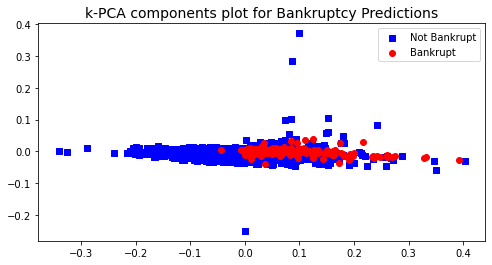

In [22]:
# Create plot from transformed dataset
X_kpca = kpca.fit(df_nolabel.iloc[:, 0:n]).transform(df_nolabel.iloc[:, 0:n])

plt.figure(figsize=(8,4))
plt.scatter(X_kpca[220:,0], X_kpca[220:,1], color='blue', marker='s', label='Not Bankrupt')
plt.scatter(X_kpca[0:219,0], X_kpca[0:219,1], color='red', marker='o', label='Bankrupt')
plt.title("k-PCA components plot for Bankruptcy Predictions", fontsize=14)
plt.legend()
plt.show()

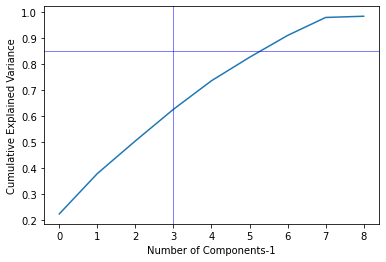

In [23]:
# Cumulative Variance explained
ax = plt.figure().gca()
pca = PCA(n_components = n).fit(df_nolabel)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axvline(x=3, linewidth=1, color='b', alpha=0.5)
plt.axhline(y=0.85, linewidth=1, color='b', alpha=0.5)
plt.xlabel('Number of Components-1')
plt.ylabel('Cumulative Explained Variance')
plt.show()

##### STANDARDIZED DATA

In [24]:
kpca = KernelPCA(n_components=n, kernel='rbf')
kpca_fit = kpca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = kpca_fit, columns = ['PC '+ str(i+1) for i in range(n)])
df_pca

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,0.055771,0.028667,-0.009080,-0.049295,-0.029156,-0.022634,-0.026692,-0.037096,-0.038437
1,-0.035291,0.000673,-0.028598,-0.025736,0.000142,-0.005382,-0.032103,-0.006744,-0.006610
2,-0.006310,0.083623,-0.067495,-0.051459,-0.033112,0.059075,0.064379,-0.020522,0.011924
3,-0.046616,0.041838,0.023616,0.009443,0.025591,-0.035140,0.080361,0.021782,-0.017526
4,0.114956,0.014185,-0.039151,0.048238,-0.018869,-0.020706,0.010651,-0.089468,0.038218
...,...,...,...,...,...,...,...,...,...
6814,-0.047369,-0.022180,0.078747,0.083263,-0.019187,0.028589,-0.026297,0.018337,0.020904
6815,-0.015368,0.028462,-0.023033,0.000809,0.005678,-0.021915,-0.033303,0.002254,-0.026701
6816,0.024734,-0.004002,0.009189,-0.041536,-0.018788,-0.034679,-0.029687,-0.060921,-0.014932
6817,0.020046,0.004926,-0.003221,0.081306,0.030265,0.041301,-0.042037,0.005328,0.000742


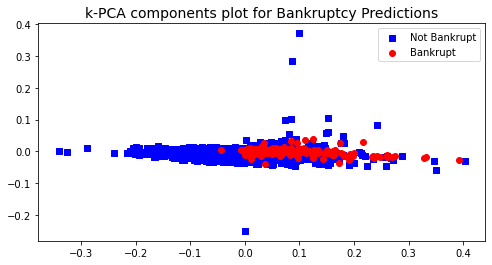

In [25]:
# Create plot from transformed dataset
X_kpca = kpca.fit(df_scaled.iloc[:, 0:n]).transform(df_scaled.iloc[:, 0:n])

plt.figure(figsize=(8,4))
plt.scatter(X_kpca[220:,0], X_kpca[220:,1], color='blue', marker='s', label='Not Bankrupt')
plt.scatter(X_kpca[0:219,0], X_kpca[0:219,1], color='red', marker='o', label='Bankrupt')
plt.title("k-PCA components plot for Bankruptcy Predictions", fontsize=14)
plt.legend()
plt.show()

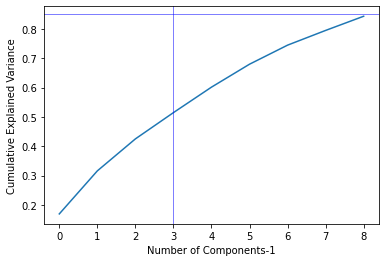

In [26]:
# Cumulative Variance explained
ax = plt.figure().gca()
pca = PCA(n_components = n).fit(df_scaled)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axvline(x=3, linewidth=1, color='b', alpha=0.5)
plt.axhline(y=0.85, linewidth=1, color='b', alpha=0.5)
plt.xlabel('Number of Components-1')
plt.ylabel('Cumulative Explained Variance')
plt.show()